In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 67s 4us/step


In [8]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
len(train_data[0])

218

In [5]:
train_labels[0]

1

In [6]:
def decode_review(review):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])
    return ' '.join([reverse_word_index.get(i-3, '?') for i in review])

In [7]:
decode_review(train_data[0])

1646592/1641221 [==============================] - 12s 7us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        results[i, seq] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [22]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.5181 - acc: 0.7854 - val_loss: 0.3928 - val_acc: 0.8620
Epoch 2/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.3061 - acc: 0.9012 - val_loss: 0.3048 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.2220 - acc: 0.9287 - val_loss: 0.2955 - val_acc: 0.8809
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1714 - acc: 0.9447 - val_loss: 0.2789 - val_acc: 0.8873
Epoch 5/20
15000/15000 [==============================] - 1s 74us/step - loss: 0.1426 - acc: 0.9519 - val_loss: 0.2923 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1152 - acc: 0.9629 - val_loss: 0.3214 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 1s 75us/step - loss: 0.0935 - acc: 0.9723 - val_loss: 0.3162 - val_acc

In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
len(history_dict['val_loss'])

20

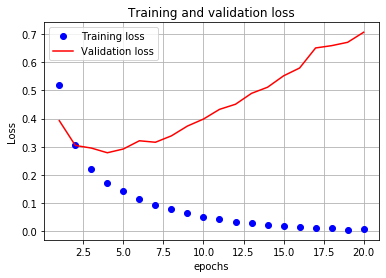

In [35]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

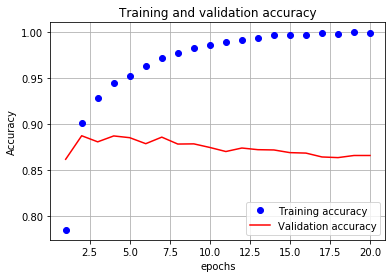

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
25000/25000 [==============================] - 1s 58us/step - loss: 0.4570 - acc: 0.8226
Epoch 2/2
25000/25000 [==============================] - 2s 91us/step


[0.28771336384773255, 0.88832]

In [43]:
model.predict(x_test)

array([[0.30454293],
       [0.99608445],
       [0.94831055],
       ...,
       [0.18370903],
       [0.18220678],
       [0.53323776]], dtype=float32)

In [57]:
def build_net(x_train, y_train, x_test, y_test, hidden_layers_num, units_num, loss_func, act_func):
    model = models.Sequential()
    model.add(layers.Dense(units_num, activation=act_func, input_shape=(10000,)))
    for _ in range(hidden_layers_num - 1):
        model.add(layers.Dense(units_num, activation=act_func))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss=loss_func, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=2, batch_size=512)
    return model.evaluate(x_test, y_test)

In [58]:
for hidden_layers_num in [1, 2, 3, 4]:
    for units_num in [8, 16, 32, 64]:
        for act_func in ['relu', 'tanh']:
            for loss_func in ['binary_crossentropy']:
                print(layers_num-1, units_num, loss_func, act_func)
                print(build_net(x_train, y_train, x_test, y_test, hidden_layers_num, units_num, loss_func, act_func))
                print()

1 8 binary_crossentropy relu
Epoch 1/2
25000/25000 [==============================] - 1s 52us/step - loss: 0.4841 - acc: 0.8294
Epoch 2/2
25000/25000 [==============================] - 1s 58us/step
[0.3216648663520813, 0.88448]

1 8 mse relu
Epoch 1/2
25000/25000 [==============================] - 1s 50us/step - loss: 0.1989 - acc: 0.6773
Epoch 2/2
25000/25000 [==============================] - 2s 70us/step
[0.16366618332862853, 0.82284]

1 8 binary_crossentropy tanh
Epoch 1/2
25000/25000 [==============================] - 1s 58us/step - loss: 0.4843 - acc: 0.8158
Epoch 2/2
25000/25000 [==============================] - 1s 58us/step
[0.32245649217605593, 0.88428]

1 8 mse tanh
Epoch 1/2
25000/25000 [==============================] - 1s 52us/step - loss: 0.1551 - acc: 0.8210
Epoch 2/2
25000/25000 [==============================] - 1s 52us/step
[0.09619129782438278, 0.88712]

1 16 binary_crossentropy relu
Epoch 1/2
25000/25000 [==============================] - 1s 59us/step - loss: 0.442

25000/25000 [==============================] - 2s 100us/step - loss: 0.3998 - acc: 0.8294
Epoch 2/2
25000/25000 [==============================] - 2s 84us/step
[0.30852247016906736, 0.87436]

2 32 mse tanh
Epoch 1/2
25000/25000 [==============================] - 3s 104us/step - loss: 0.1319 - acc: 0.8170
Epoch 2/2
25000/25000 [==============================] - 2s 81us/step
[0.08472101882815361, 0.88584]

2 64 binary_crossentropy relu
Epoch 1/2
25000/25000 [==============================] - 3s 115us/step - loss: 0.4230 - acc: 0.8108
Epoch 2/2
25000/25000 [==============================] - 3s 115us/step
[0.2916613726615906, 0.8834]

2 64 mse relu
Epoch 1/2
25000/25000 [==============================] - 3s 117us/step - loss: 0.1340 - acc: 0.8132
Epoch 2/2
25000/25000 [==============================] - 3s 116us/step
[0.08394396528482437, 0.88716]

2 64 binary_crossentropy tanh
Epoch 1/2
25000/25000 [==============================] - 3s 119us/step - loss: 0.4034 - acc: 0.8184
Epoch 2/2
2500

25000/25000 [==============================] - 3s 110us/step - loss: 0.4873 - acc: 0.8050
Epoch 2/2
25000/25000 [==============================] - 2s 100us/step
[0.288615110874176, 0.88604]

4 16 mse relu
Epoch 1/2
25000/25000 [==============================] - 3s 103us/step - loss: 0.1642 - acc: 0.7999
Epoch 2/2
25000/25000 [==============================] - 3s 101us/step
[0.08784470031738281, 0.88556]

4 16 binary_crossentropy tanh
Epoch 1/2
25000/25000 [==============================] - 3s 111us/step - loss: 0.4091 - acc: 0.8226
Epoch 2/2
25000/25000 [==============================] - 3s 111us/step
[0.29300787696838376, 0.88172]

4 16 mse tanh
Epoch 1/2
25000/25000 [==============================] - 3s 133us/step - loss: 0.1365 - acc: 0.8169
Epoch 2/2
25000/25000 [==============================] - 3s 107us/step
[0.09682492219805718, 0.87044]

4 32 binary_crossentropy relu
Epoch 1/2
25000/25000 [==============================] - 3s 128us/step - loss: 0.4523 - acc: 0.8003
Epoch 2/2
25